<a href="https://colab.research.google.com/github/johannesR17/predicciones-de-ventas-alimenticias/blob/main/predicciones_de_ventas1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO: Proyecto 1_Parte 3**
## Creado por: Johannes Rodríguez

* Fecha creado: 17/03/2023
* Fecha de actualización: 19/03/2023
* Descripción: este script perform my first portfolio.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Python for Data Science/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. ¿Cuántas filas y columnas?

2. ¿Cuáles son los tipos de datos en cada variable?

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4. Identifiquen los valores faltantes.

5. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6. Confirmen que no hay valores faltantes después de abordarlos.

7. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [4]:
# row and columns
df.shape

(8523, 12)

In [5]:
# Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Duplos
df.duplicated().sum()

0

In [7]:
# absence values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Tackled absence values

  # Media
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace= True)

  # Moda
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace= True)

In [9]:
# Checking absence values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Fixing inconsistent category
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# Fixing inconsistent category
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat','reg':'Regular'})

In [12]:
# Summary statistics
df['Item_MRP'].min()

31.29

In [13]:
# Summary statistics
df['Item_MRP'].max()

266.8884

In [14]:
# Summary statistics
df['Item_MRP'].mean()

140.9927819781767

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

a) Histograma

In [15]:
df['Item_MRP'].head()

0    249.8092
1     48.2692
2    141.6180
3    182.0950
4     53.8614
Name: Item_MRP, dtype: float64

<Axes: >

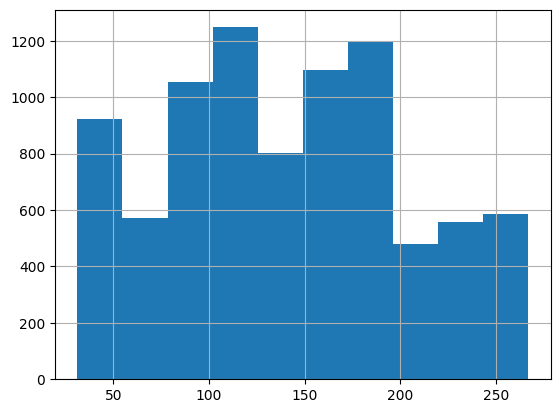

In [16]:
df['Item_MRP'].hist()

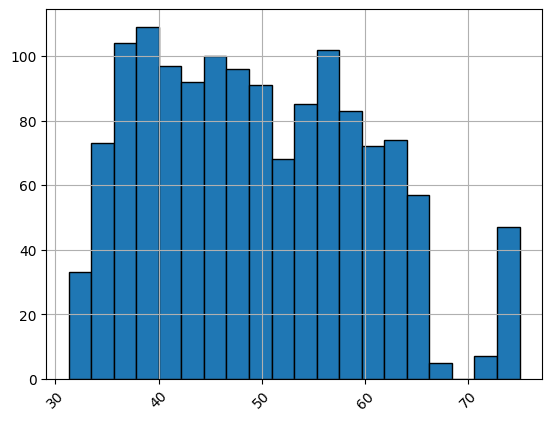

In [17]:
import matplotlib.pyplot as plt

ItemMRP_filter = df.loc[:, 'Item_MRP'] <= 75
df.loc[ItemMRP_filter, 'Item_MRP'].hist(bins = 20,
                                                                      edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

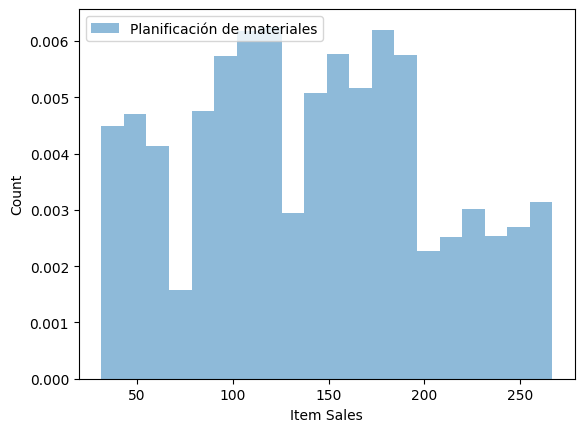

In [18]:
plt.hist(df["Item_MRP"], bins = 20, alpha=0.5, density=True, label='Planificación de materiales')
plt.xlabel('Item Sales')
plt.ylabel('Count')
plt.legend(loc='upper left')

De acuerdo al marco de "Requerimientos de insumos" se necesita una cantidad entre 80% y 200% con una frecuencia de 1200 aproximadamente para la predicción de estas ventas.



b) Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

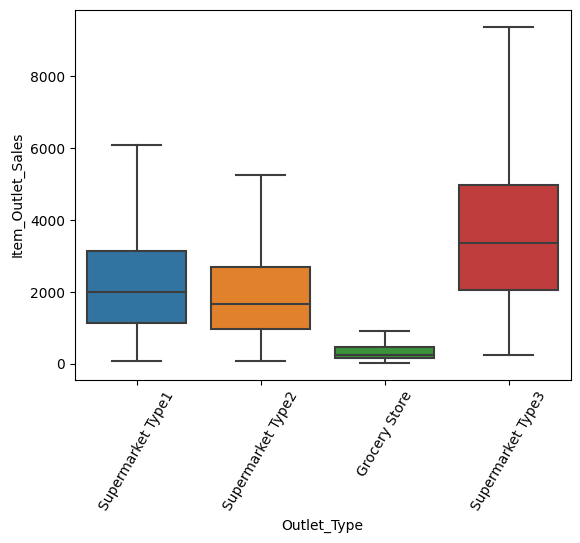

In [19]:
import seaborn as sns
sns.boxplot(y="Item_Outlet_Sales", x="Outlet_Type", data=df, orient='v', showfliers=False)
plt.xticks(rotation = 60)

Antes que nada, establecí un versus de la variable categórica con la variable numérica. En la que se puede apreciar que la media de "Supermarket Tipo 1" es 2000, "Supermarket Tipo 2" tiene alrededor de 1800-1900, mientras que la "Tienda de comestibles" se puede inferir que está en 500% más o menos, y "Supermarket Tipo 3" cuya media de 3500 aproximadamente.

Recuperado de: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot

c) Heatmap

In [20]:
corr = df.corr()

<ipython-input-20-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

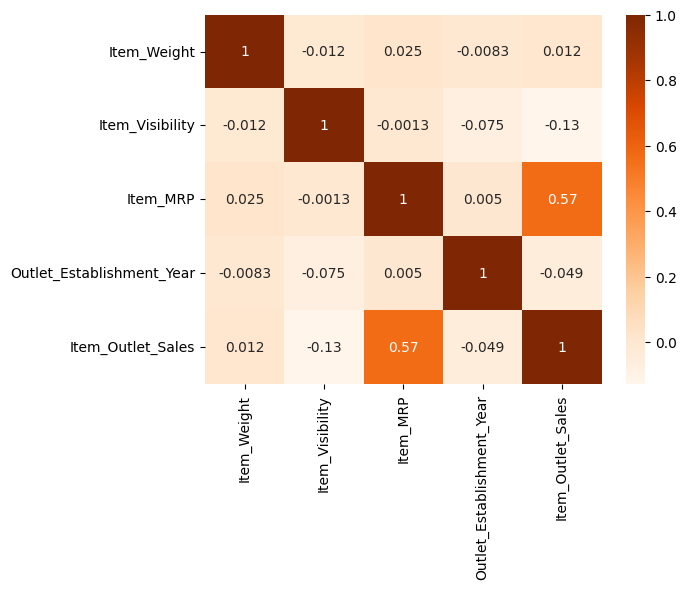

In [21]:
sns.heatmap(corr, cmap = 'Oranges', annot = True)

Se refleja que hay una perfecta combinación, ya que as columnas se están comparando unas a otras. En añadidura, las variables "Item_MRP" e "Item_Outlet_Sales" se correlacion positivamente, por lo que podremos obtener una satisfactoria predicción de ventas a través de esta ventana, canal.